# TASK 1: IMPORT LIBRARIES AND DATASET

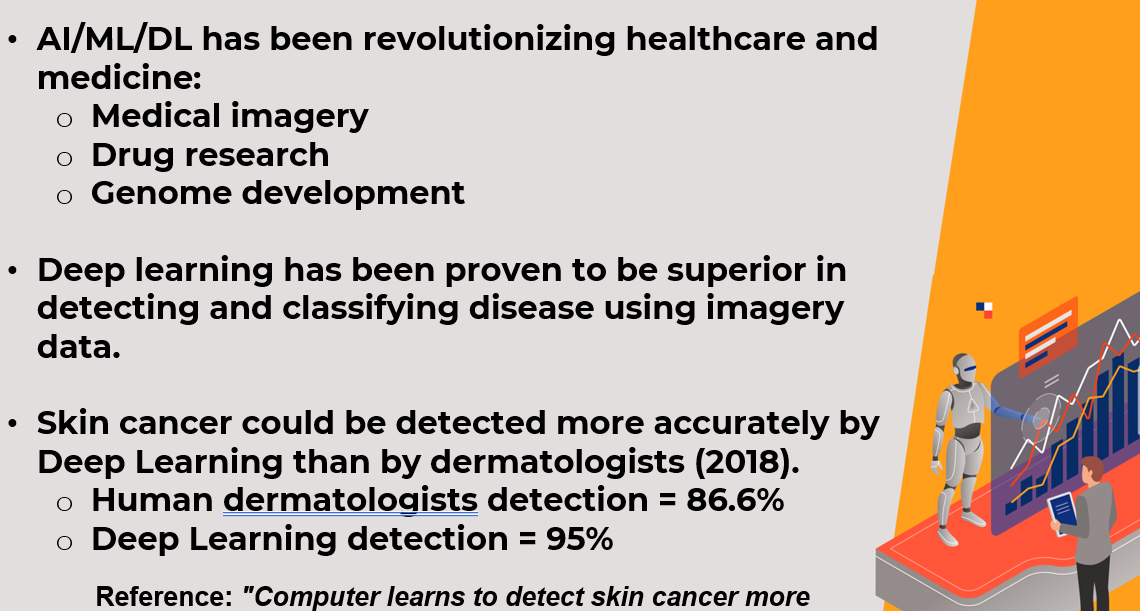

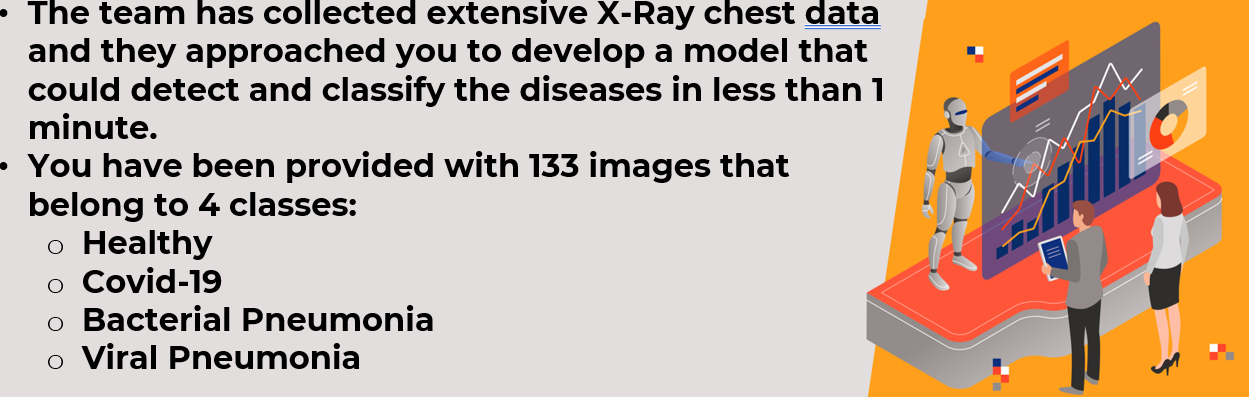

In [4]:
# !pip install opencv-python

In [1]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# each class contains 133 images.
# dataset Source -
# https://github.com/ieee8023/covid-chestxray-dataset
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers, optimizers
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model, load_model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
# #  mount your drive using the following commands:
# # For more information regarding mounting,check this: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Specify training data directory
# x_ray = '/content/drive/../train'
x_ray_dr = r'C:\Users\Dell\Downloads\Analysis\project6-CNN\4. Operations Department\Dataset'

In [3]:
os.listdir(x_ray_dr)

['0', '1', '2', '3']

In [4]:
# List the folders in the directory
# os.listdir(x_ray)
os.listdir('4. Operations Department/Dataset') # directory

['0', '1', '2', '3']

In [5]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation
img_gen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

In [6]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing
train_generator = img_gen.flow_from_directory(batch_size=40,directory=x_ray_dr,shuffle=True,target_size=(256,256),class_mode='categorical',subset='training') # shuffle to shuffle order

Found 428 images belonging to 4 classes.


In [7]:
validation_generator = img_gen.flow_from_directory(batch_size=40,directory=x_ray_dr,shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generate a batch of 40 images and labels
train_images,train_labels = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels.shape

(40, 4)

In [11]:
# it displaying the data in one hot encoding fashion - 
train_labels

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]],

In [12]:
# labels Translator
label_name = {0:'Covid-19',1:'Normal',2:'Viral Pneumonia',3:'Bacterial Pneumonia'}

# TASK 2: VISUALIZE DATASET

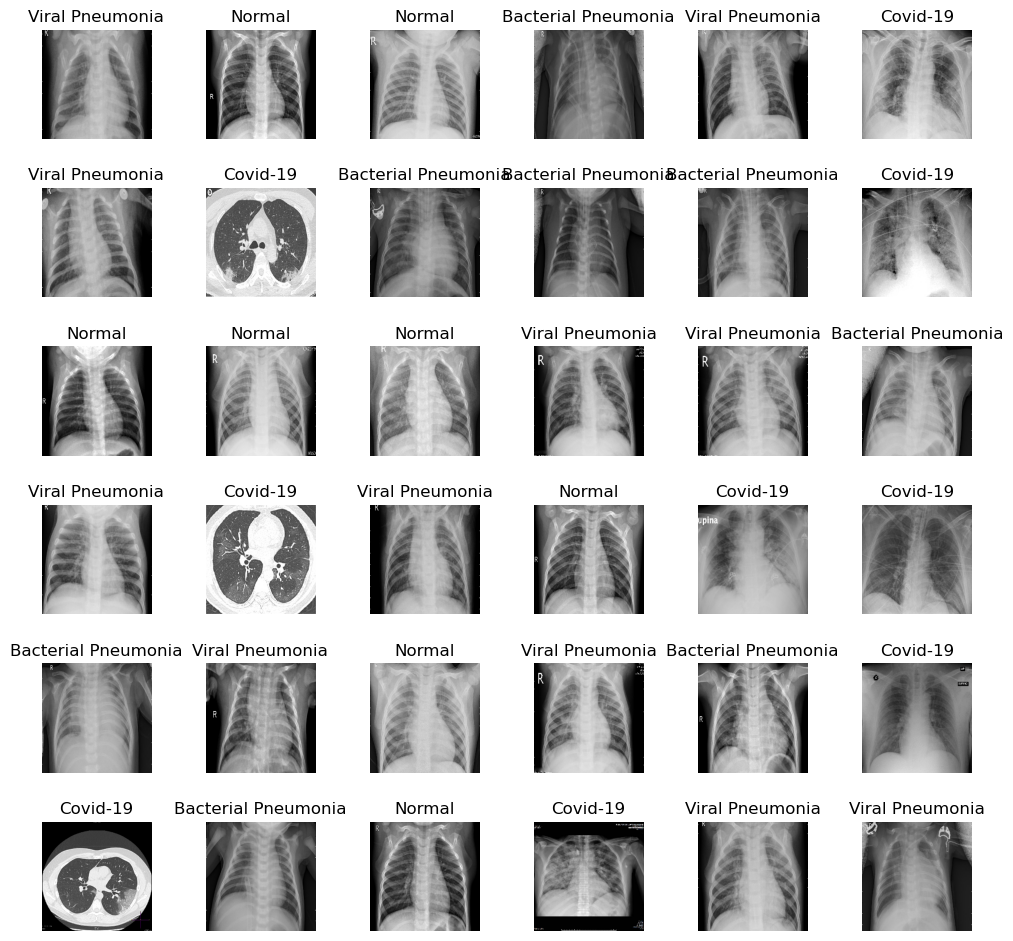

In [13]:
L = 6
W = 6

fig,ax = plt.subplots(L,W,figsize = (12,12))
ax = ax.ravel() # flatten the axes

for i in np.arange(0,L*W):
    ax[i].imshow(train_images[i])
    ax[i].set_title(label_name[np.argmax(train_labels[i])]) # maximum value in the one-hot encoded label at index i
    ax[i].axis('off') # seting axes number and ticks off 
plt.subplots_adjust(wspace=0.5)

# TASK 3: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

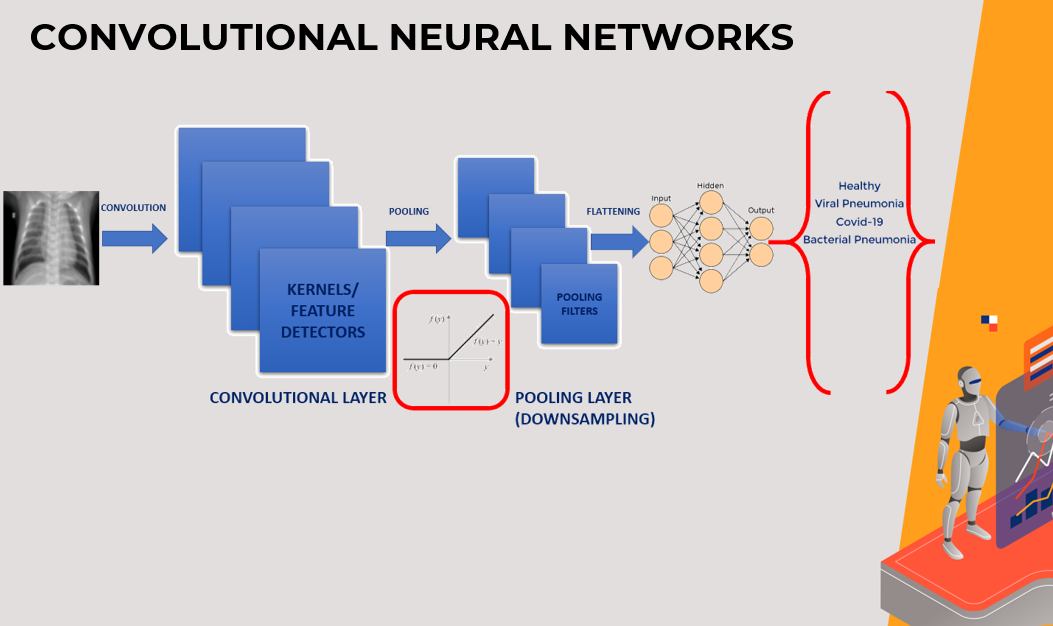

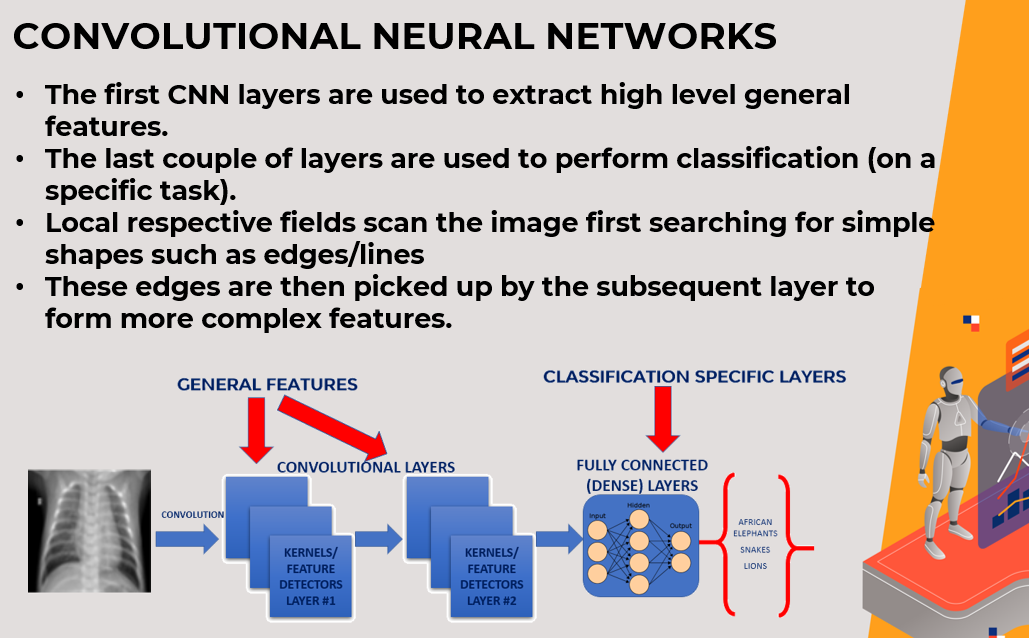

# TASK 4: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

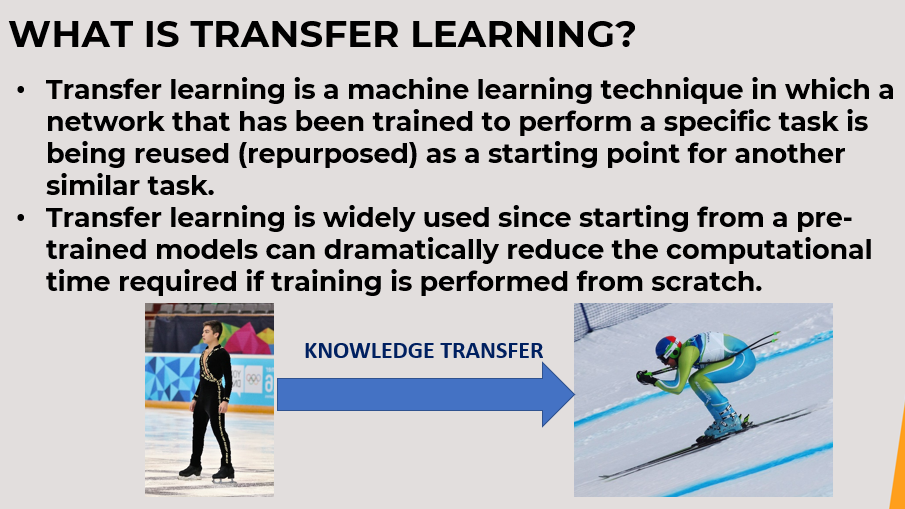

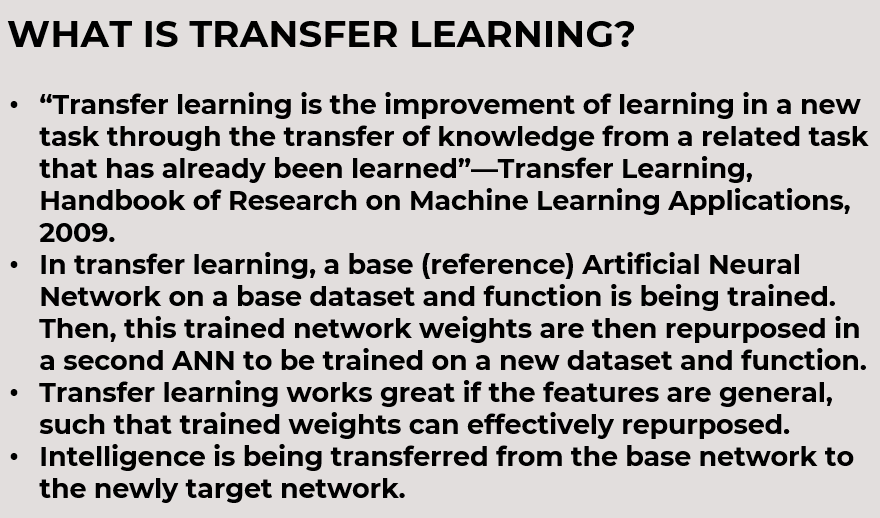

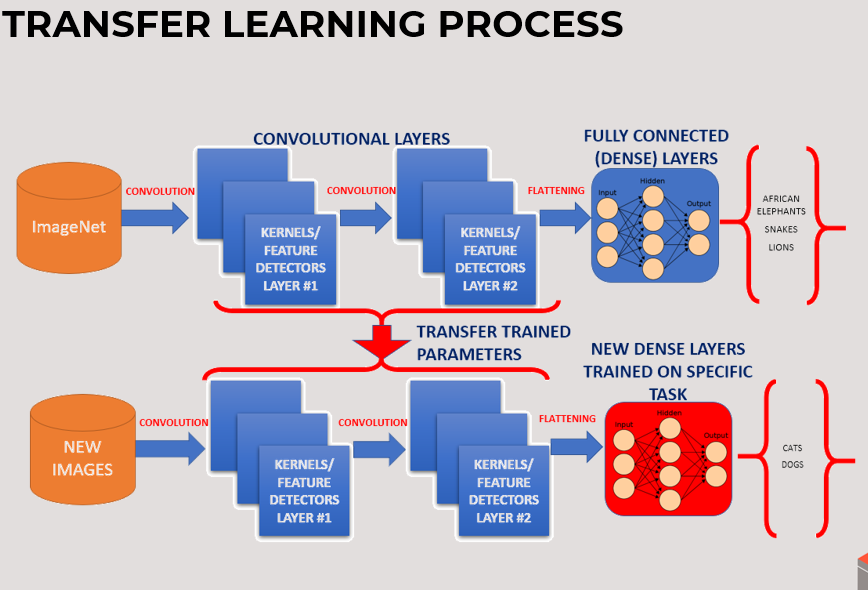

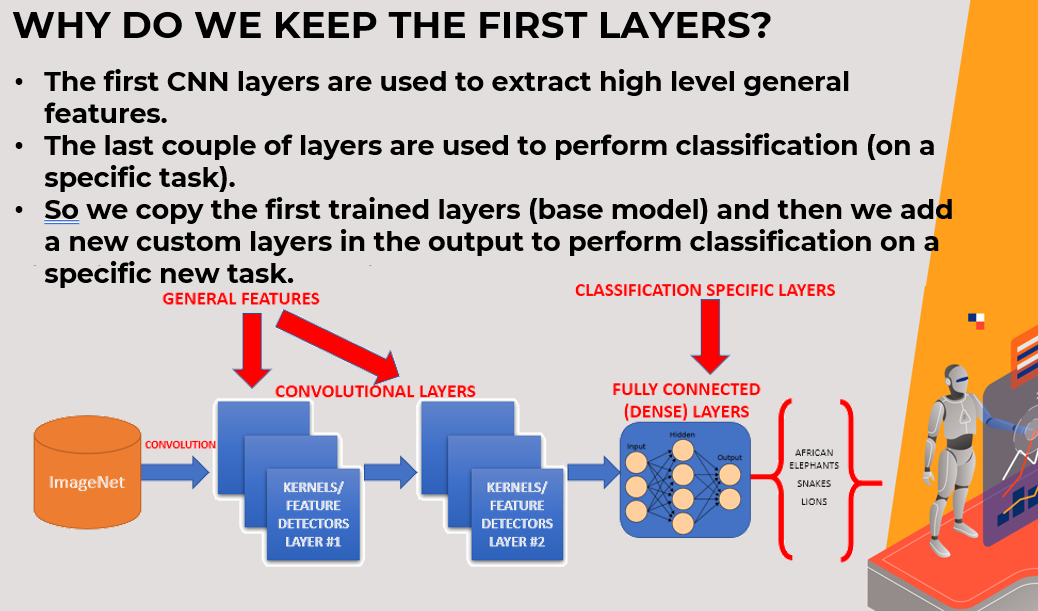

# TASK 5: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [14]:
# pre-trained model 1
from keras.applications.resnet50 import ResNet50
basemodel = ResNet50(weights = 'imagenet',include_top = False,input_tensor=Input(shape=(256,256,3)))

In [18]:
# pre-trained model 2
# EfficientNet-B0 matches ResNet50 accuracy with far fewer parameters
# EfficientNet-B7 achieves state-of-the-art 84.4% top-1 accuracy on ImageNet.
from tensorflow.keras.applications import EfficientNetB0
basemodel = EfficientNetB0(
    weights = 'imagenet',
    include_top = False,
    input_tensor = Input(shape=(256, 256, 3)))

In [19]:
basemodel.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 256, 256, 3)          0         ['normalization_1

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 64, 64, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 64, 64, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 64, 64, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 32, 32, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 32, 32, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 32, 32, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 16, 16, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 16, 16, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 16, 16, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 16, 16, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 16, 16, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 16, 16, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 16, 16, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 16, 16, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 16, 16, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 16, 16, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 16, 16, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 8, 8, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 8, 8, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 8, 8, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 8, 8, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 8, 8, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 8, 8, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 8, 8, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 8, 8, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 8, 8, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
Total params: 4049571 (15.45 MB)
Trainable params: 4007548 (15.29 MB)
Non-trainable params: 42023 (164.16 KB)
__________________________________________________________________________________________________


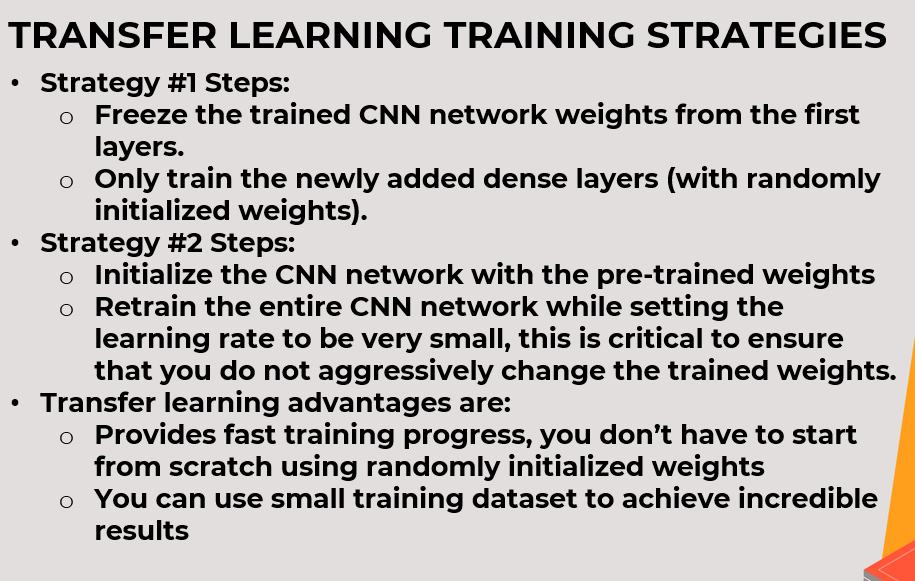

In [20]:
# freezing layers in the model
# setting all previous layer except last 10 layers, as not trainable
for layer in basemodel.layers[:-10]:
    layer.trainable = False

# TASK 6: BUILD AND TRAIN DEEP LEARNING MODEL

In [28]:
# create trainable layer - 
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)

# headmodel = Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(headmodel)
# headmodel = BatchNormalization()(headmodel)
# headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(4,activation='softmax')(headmodel)

In [29]:
model = Model(inputs = basemodel.input, outputs=headmodel)

In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 256, 256, 3)          0         ['normalization_1[0][0]'

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 64, 64, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 64, 64, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 64, 64, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 32, 32, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 32, 32, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 32, 32, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 16, 16, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 16, 16, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 16, 16, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 16, 16, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 16, 16, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 16, 16, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 16, 16, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 16, 16, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 16, 16, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 16, 16, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 16, 16, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 8, 8, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 8, 8, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 8, 8, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 8, 8, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 8, 8, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 8, 8, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 8, 8, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 8, 8, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 8, 8, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 average_pooling2d_1 (Avera  (None, 2, 2, 1280)           0         ['top_activation[0][0]']      
 gePooling2D)                                                                                     
                                                                                                  
 flatten (

In [31]:
# model.compile(loss='categorical_crossentropy',optimizer = optimizers.RMSprop(learning_rate=0.001),metrics = ['accuracy'])
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20) #restore_best_weights=True)
# save the best model with lower validation loss
# restore_best_weights=True - automatically load the best weights into the model at the end of training
checkpointer = ModelCheckpoint(filepath='weights.hdf5',verbose=1,save_best_only=True) 

In [33]:
trn_generator = img_gen.flow_from_directory(batch_size=4,directory=x_ray_dr,shuffle=True,target_size=(256,256),class_mode='categorical',subset='training')
val_generator = img_gen.flow_from_directory(batch_size=4,directory=x_ray_dr,shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


if you have a large dataset, it might be more efficient to process a smaller number of batches per epoch, which is what the second approach allows you to control explicitly with steps_per_epoch and validation_steps.

trn_generator,steps_per_epoch=trn_generator.n // 4 ,epochs=25,validation_data=val_generator,validation_steps=val_generator.n //4,callbacks=[checkpointer,earlystopping]

In [34]:
# hist = model.fit_generator(trn_generator,epochs=10,validation_data=val_generator,callbacks=[checkpointer,earlystopping])
hist = model.fit_generator(trn_generator,steps_per_epoch=trn_generator.n // 4 ,epochs=30,validation_data=val_generator,validation_steps=val_generator.n //4,callbacks=[checkpointer,earlystopping])

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 1.4881 - accuracy: 0.2710
Epoch 1: val_loss improved from inf to 1.59820, saving model to weights.hdf5
107/107 [==============================] - 42s 300ms/step - loss: 1.4881 - accuracy: 0.2710 - val_loss: 1.5982 - val_accuracy: 0.2500
Epoch 2/30
107/107 [==============================] - ETA: 0s - loss: 1.4548 - accuracy: 0.2547
Epoch 2: val_loss improved from 1.59820 to 1.45242, saving model to weights.hdf5
107/107 [==============================] - 30s 281ms/step - loss: 1.4548 - accuracy: 0.2547 - val_loss: 1.4524 - val_accuracy: 0.2500
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 1.4258 - accuracy: 0.2360
Epoch 3: val_loss improved from 1.45242 to 1.43004, saving model to weights.hdf5
107/107 [==============================] - 30s 281ms/step - loss: 1.4258 - accuracy: 0.2360 - val_loss: 1.4300 - val_accuracy: 0.2500
Epoch 4/30
107/107 [==============================] - ETA: 0s - loss: 1

KeyboardInterrupt: 

In [ ]:
# train for more epochs if running first time atleast set epochs to >50 to see some decent results.

In [ ]:
# from tensorflow.keras.models import load_model
# # Load the model with the best weights for deployement
# best_model = load_model('weights.hdf5')

# TASK 7: EVALUATE TRAINED DEEP LEARNING MODEL

In [96]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

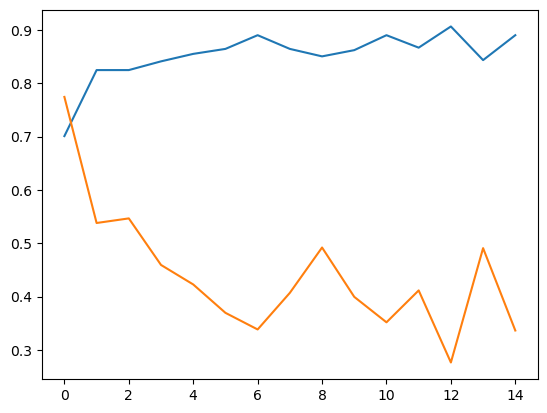

In [97]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])

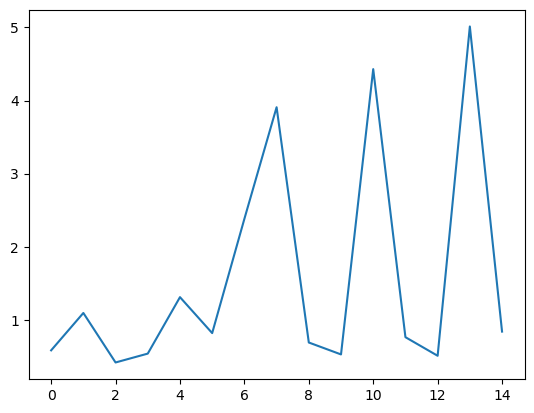

In [98]:
plt.plot(hist.history['val_loss'])

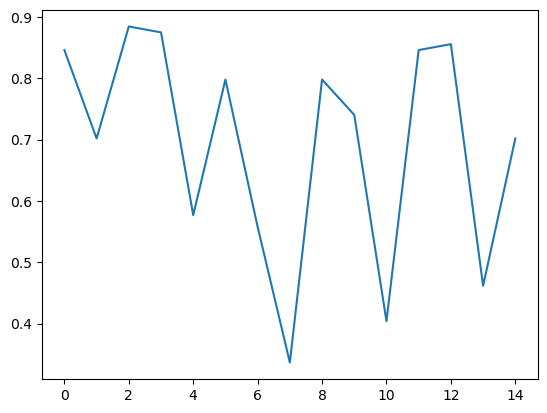

In [99]:
plt.plot(hist.history['val_accuracy'])

Text(0, 0.5, 'accuracy')

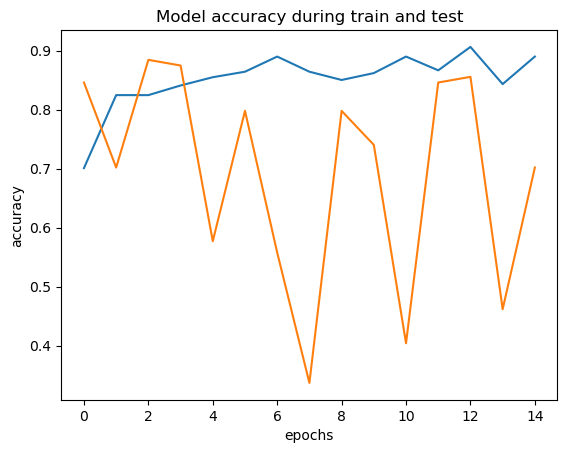

In [100]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='test')
plt.title('Model accuracy during train and test')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [101]:
x_ray_Test = r'C:\Users\Dell\Downloads\Analysis\project6-CNN\4. Operations Department\Test'

In [103]:
test_gen = ImageDataGenerator(rescale=1./255)
tst_generator = test_gen.flow_from_directory(batch_size=4,directory=x_ray_Test,shuffle=True,target_size=(256,256),class_mode='categorical')
evaluate = model.evaluate_generator(tst_generator,steps=tst_generator.n//4,verbose=1)
# print(f'Accuracy : {evaluate[1]}')
print('Accuracy : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.
10/10 [==============================] - 5s 521ms/step - loss: 1.6249 - accuracy: 0.6250
Accuracy : 0.625


In [104]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred =[]
org = []
image = []

for i in range(len(os.listdir(x_ray_Test))):
    for item in os.listdir(os.path.join(x_ray_Test,str(i))):
        img = cv2.imread(os.path.join(x_ray_Test,str(i),item))
        img = cv2.resize(img,(256,256))
        image.append(img)
        img = img/255
        img = img.reshape(-1,256,256,3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        pred.append(predict)
        org.append(i)

1/1 [==============================] - 0s 180ms/step


In [105]:
score = accuracy_score(org,pred)
print(f'Test Accuracy - {score}')

Test Accuracy - 0.625


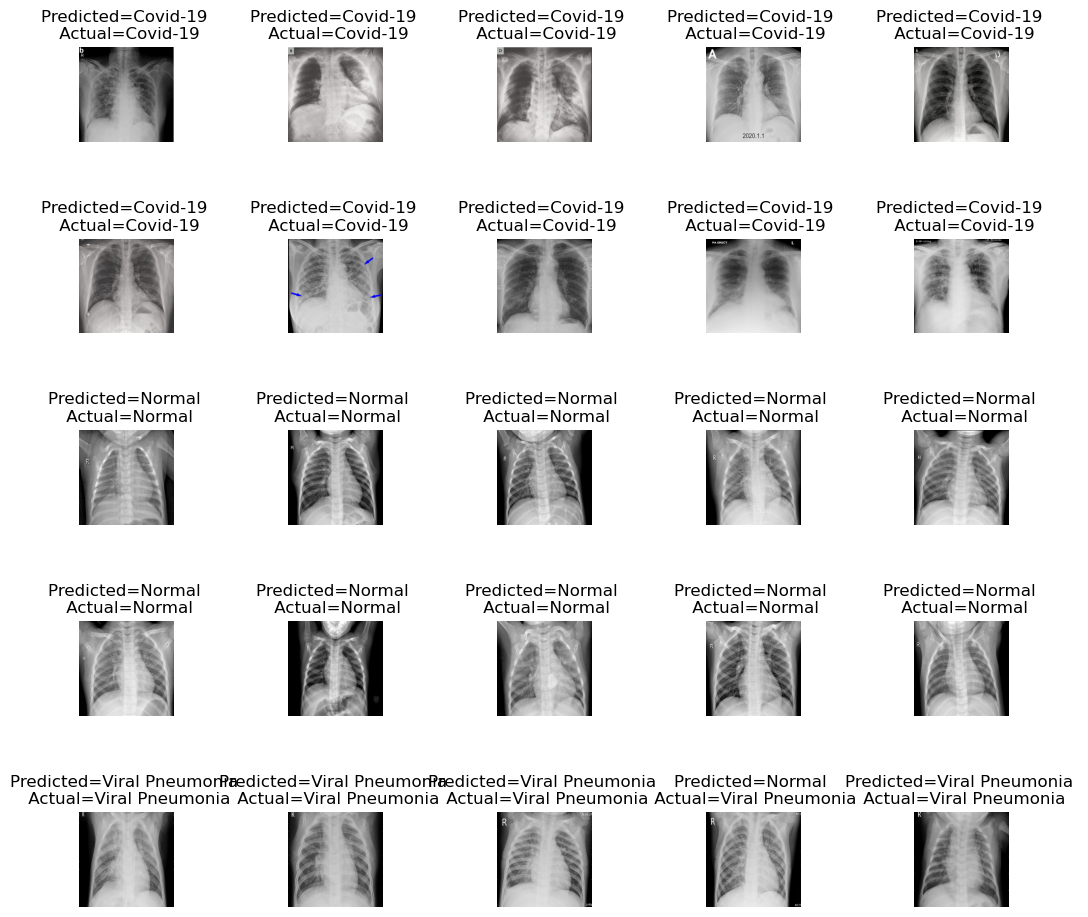

In [106]:
L = 5
W = 5

fig,ax = plt.subplots(L,W,figsize = (12,12))
ax = ax.ravel()
for i in np.arange(0,L*W):
    ax[i].imshow(image[i])
    ax[i].set_title(f'Predicted={str(label_name[pred[i]])} \n Actual={str(label_name[org[i]])}')
    ax[i].axis('off')
plt.subplots_adjust(wspace=1.2)

In [107]:
print(classification_report(np.asarray(org),np.asarray(pred)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.53      1.00      0.69        10
           2       0.83      0.50      0.62        10
           3       0.00      0.00      0.00        10

    accuracy                           0.62        40
   macro avg       0.51      0.62      0.53        40
weighted avg       0.51      0.62      0.53        40



Text(0.5, 1.0, 'confusion matrix')

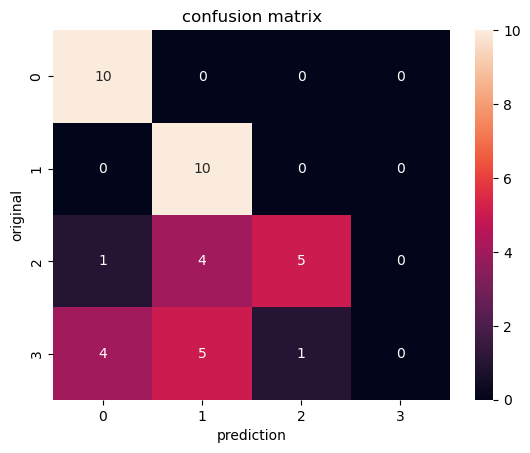

In [108]:
cm = confusion_matrix(np.asarray(org),np.asarray(pred))
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)
ax.set_xlabel('prediction')
ax.set_ylabel('original')
ax.set_title('confusion matrix')